In [730]:
import pandas as pd
import numpy as np
import zipfile
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**Extracting the data**




In [2]:
with zipfile.ZipFile("data.zip", 'r') as z:
  z.extractall(".")

Reading the train flag table

In [3]:
data_train_flag = pd.read_csv("/content/data/train/train_flag.csv")
data_train_flag

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0
...,...,...,...
261378,BAO14050568,Cash loans,0
261379,NDO00278120,Cash loans,0
261380,LDY78194712,Cash loans,0
261381,EVH98380736,Revolving loans,0


In [4]:
data_train_flag['uid'].nunique()

261383

In [5]:
data_train_flag.isnull().sum().sort_values(ascending=False)

uid                   0
NAME_CONTRACT_TYPE    0
TARGET                0
dtype: int64

In [6]:
data_train_flag['TARGET'].value_counts()

TARGET
0    240326
1     21057
Name: count, dtype: int64

In [7]:
data_train_flag['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         236524
Revolving loans     24859
Name: count, dtype: int64

<Axes: title={'center': 'Contract Type'}, xlabel='NAME_CONTRACT_TYPE'>

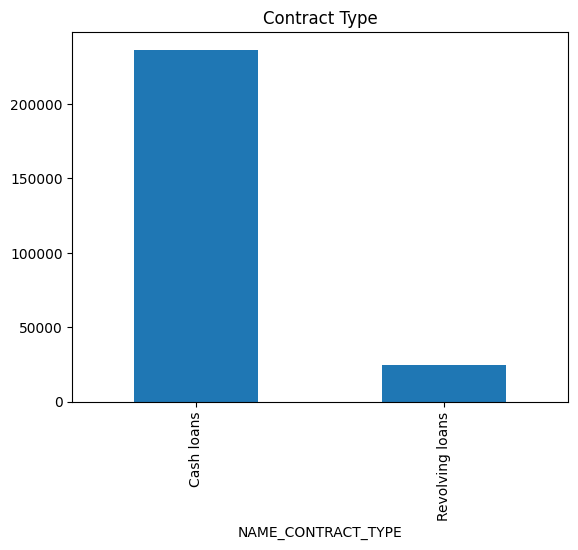

In [8]:
data_train_flag['NAME_CONTRACT_TYPE'].value_counts().plot.bar(title='Contract Type')

In [9]:
from sklearn.preprocessing import LabelEncoder

Converting the Contract type to numeric

In [10]:
label_encoder = LabelEncoder()
data_train_flag['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(data_train_flag['NAME_CONTRACT_TYPE'])
data_train_flag.set_index('uid', inplace=True)
data_train_flag

,NAME_CONTRACT_TYPE,TARGET
uid,,
XDA69787158,0,0
BSE47789733,0,0
NTJ92213825,0,0
TCQ47571695,0,0
WJZ68772744,0,0
...,...,...
BAO14050568,0,0
NDO00278120,0,0
LDY78194712,0,0


In [11]:
import json

Reading the Accounts table

In [12]:
with open('/content/data/train/accounts_data_train.json') as j:
    data = json.load(j)

In [13]:
len(data)

223918

In [14]:
data1 = []
for i in data:
  data1.extend(i)

In [15]:
len(data1)

1245310

In [16]:
data_train_accounts = pd.DataFrame.from_records(data1)
data_train_accounts.head(10)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915
5,Consumer credit,46696.500,0.0,2016-11-20,2017-10-06,000000000000000000000000000000,AAA20326915
6,Credit card,0.000,0.0,2014-09-10,2018-08-30,0000000000000000000000000000000000000000000000...,AAA20326915
7,Consumer credit,117000.000,0.0,2018-02-04,2018-05-06,000000000,AAA20326915
8,Consumer credit,90000.000,0.0,2020-03-12,2020-04-12,000,AAA20326915
9,Consumer credit,235800.000,0.0,2020-03-29,2020-05-13,000,AAA20326915


In [17]:
data_train_accounts.isnull().sum().sort_values(ascending=False)

closed_date            463035
loan_amount                 3
credit_type                 0
amount_overdue              0
open_date                   0
payment_hist_string         0
uid                         0
dtype: int64

Dropping the Null values

In [18]:
data_train_accounts = data_train_accounts.dropna(subset=['loan_amount'])
data_train_accounts.isnull().sum().sort_values(ascending=False)

closed_date            463033
credit_type                 0
loan_amount                 0
amount_overdue              0
open_date                   0
payment_hist_string         0
uid                         0
dtype: int64

Taking the rows having non zero loan

In [19]:
data_train_accounts = data_train_accounts[data_train_accounts['loan_amount'] != 0]

In [20]:
data_train_accounts

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915
...,...,...,...,...,...,...,...
1245305,Consumer credit,100116.000,0.0,2017-05-12,2017-06-15,000,ZZZ93377613
1245306,Consumer credit,34839.000,0.0,2016-11-11,2017-12-17,000000000000000000000000000000000000000,ZZZ93377613
1245307,Consumer credit,18589.500,0.0,2015-12-10,2016-05-12,000000000000000,ZZZ93377613
1245308,Consumer credit,24997.500,0.0,2020-09-19,NaN,000000000,ZZZ93377613


In [728]:
data_train_accounts['credit_type'].value_counts()

credit_type
Consumer credit                                 908634
Credit card                                     245399
Car loan                                         20237
Mortgage                                         13195
Microloan                                         7766
Loan for business development                     1466
Unknown type of loan                               374
Loan for working capital replenishment             320
Another type of loan                               275
Real estate loan                                    17
Cash loan (non-earmarked)                           17
Loan for the purchase of equipment                  16
Loan for purchase of shares (margin lending)         4
Interbank credit                                     1
Mobile operator loan                                 1
Name: count, dtype: int64

<Axes: xlabel='credit_type'>

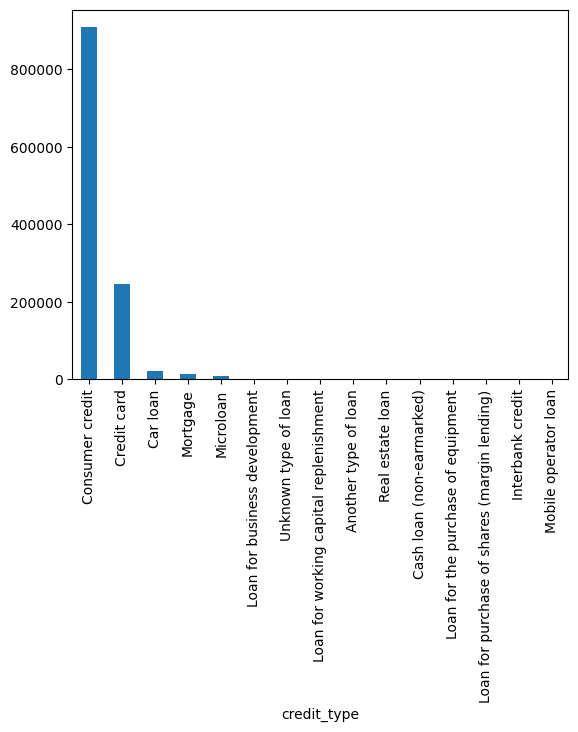

In [727]:
data_train_accounts['credit_type'].value_counts().plot.bar()

In [736]:
data_train_accounts['amount_overdue'].value_counts().sort_values(ascending=True)

amount_overdue
42435.000          1
228.375            1
13140.000          1
330.120            1
226.125            1
              ...   
18.000            52
13.500            63
9.000             79
4.500            231
0.000        1194697
Name: count, Length: 1243, dtype: int64

In [21]:
data_train_accounts['open_date'] = pd.to_datetime(data_train_accounts['open_date'])

In [22]:
import datetime
data_train_accounts['closed_date'].fillna(datetime.datetime.today().date(),inplace=True)
data_train_accounts['closed_date'] = pd.to_datetime(data_train_accounts['closed_date'])

In [23]:
data_train_accounts.dtypes

credit_type                    object
loan_amount                   float64
amount_overdue                float64
open_date              datetime64[ns]
closed_date            datetime64[ns]
payment_hist_string            object
uid                            object
dtype: object

Calculating the days to calculate the overdue ratio and overdue time ratio

In [24]:
data_train_accounts['days'] = (data_train_accounts['closed_date'] - data_train_accounts['open_date']).dt.days

In [25]:
data_train_accounts['overdue_ratio'] = data_train_accounts['amount_overdue']/data_train_accounts['loan_amount']
data_train_accounts['overdue_time_r'] = data_train_accounts['amount_overdue']/data_train_accounts['days']

In [26]:
data_train_accounts.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,days,overdue_ratio,overdue_time_r
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,518,0.0,0.0
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,504,0.0,0.0
2,Credit card,80996.445,0.0,2020-06-29,2024-05-06,000000000000000000,AAA10545297,1407,0.0,0.0
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,92,0.0,0.0
4,Credit card,10480.500,0.0,2014-09-10,2024-05-06,0000000000000000000000000000000000000000000000...,AAA20326915,3526,0.0,0.0


<Axes: xlabel='credit_type'>

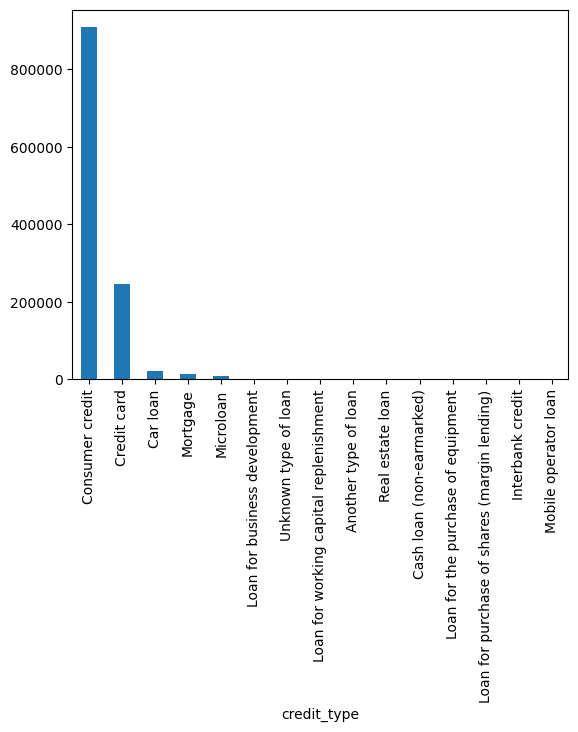

In [27]:
data_train_accounts['credit_type'].value_counts().plot.bar()

applying the functions to dataframe to get maximum day of overdue, total days of overdue, and number of times overdue happened

In [28]:
def payment_to_overdues(a):
  p = 0
  for i in range(0, len(a), 3):
    part = a[i:i+3]
    p+= int(part)

  return p

In [29]:
def payment_to_maxi(a):
  maxi = 0
  for i in range(0, len(a), 3):
    part = a[i:i+3]
    maxi = max(maxi,int(part))

  return maxi

In [30]:
def payment_to_count(a):
  c=0
  for i in range(0, len(a), 3):
    part = a[i:i+3]
    if int(part) !=0:
      c+=1

  return c


In [31]:
data_train_accounts['overdue_days']= data_train_accounts['payment_hist_string'].apply(payment_to_overdues)
data_train_accounts['maxi_overdue']= data_train_accounts['payment_hist_string'].apply(payment_to_maxi)
data_train_accounts['time_of_overdue'] = data_train_accounts['payment_hist_string'].apply(payment_to_count)
data_train_accounts.head(10)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,days,overdue_ratio,overdue_time_r,overdue_days,maxi_overdue,time_of_overdue
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,518,0.0,0.0,10,10,1
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,504,0.0,0.0,58,44,2
2,Credit card,80996.445,0.0,2020-06-29,2024-05-06,000000000000000000,AAA10545297,1407,0.0,0.0,0,0,0
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,92,0.0,0.0,0,0,0
4,Credit card,10480.500,0.0,2014-09-10,2024-05-06,0000000000000000000000000000000000000000000000...,AAA20326915,3526,0.0,0.0,14477,917,31
5,Consumer credit,46696.500,0.0,2016-11-20,2017-10-06,000000000000000000000000000000,AAA20326915,320,0.0,0.0,0,0,0
7,Consumer credit,117000.000,0.0,2018-02-04,2018-05-06,000000000,AAA20326915,91,0.0,0.0,0,0,0
8,Consumer credit,90000.000,0.0,2020-03-12,2020-04-12,000,AAA20326915,31,0.0,0.0,0,0,0
9,Consumer credit,235800.000,0.0,2020-03-29,2020-05-13,000,AAA20326915,45,0.0,0.0,0,0,0
10,Consumer credit,46620.000,0.0,2020-06-22,2024-05-06,000000000000000000,AAA20326915,1414,0.0,0.0,0,0,0


In [32]:
data_max_overdue = data_train_accounts.groupby('uid')['maxi_overdue'].max()
data_max_overdue = pd.DataFrame(data_max_overdue)
data_max_overdue

,maxi_overdue
uid,
AAA09044550,44
AAA10545297,0
AAA14112888,0
AAA20326915,917
AAA31604840,0
...,...
ZZZ74526004,33
ZZZ78449185,4
ZZZ79008454,19


In [33]:
no_times_loan = data_train_accounts.groupby('uid')['loan_amount'].count()
no_times_loan = pd.DataFrame(no_times_loan)
no_times_loan.rename(columns={'loan_amount': 'no_times_loan'}, inplace=True)
no_times_loan

,no_times_loan
uid,
AAA09044550,2
AAA10545297,1
AAA14112888,1
AAA20326915,7
AAA31604840,5
...,...
ZZZ74526004,3
ZZZ78449185,7
ZZZ79008454,3


In [34]:
data_train_accounts1 = data_train_accounts[['loan_amount','amount_overdue','uid','time_of_overdue','overdue_ratio','overdue_time_r','overdue_days']]
data_train_accounts2 = data_train_accounts1.groupby('uid').sum()

In [35]:
data_train_accounts2 = data_train_accounts2.join(no_times_loan)
data_train_accounts2 = data_train_accounts2.join(data_max_overdue)
data_train_accounts2['average_overdues'] = data_train_accounts2['overdue_days']/data_train_accounts2['no_times_loan']
data_train_accounts2['average_loan'] = data_train_accounts2['loan_amount']/data_train_accounts2['no_times_loan']
data_train_accounts3 = data_train_accounts2[['average_loan','time_of_overdue','overdue_ratio','overdue_time_r','overdue_days','no_times_loan','maxi_overdue','average_overdues']]
data_train_accounts3.head(10)

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues
uid,,,,,,,,
AAA09044550,138622.500000,3,0.0,0.0,68,2,44,34.000000
AAA10545297,80996.445000,0,0.0,0.0,0,1,0,0.000000
AAA14112888,43771.500000,0,0.0,0.0,0,1,0,0.000000
AAA20326915,84513.857143,31,0.0,0.0,14477,7,917,2068.142857
AAA31604840,318392.100000,0,0.0,0.0,0,5,0,0.000000
AAA54240429,61762.500000,0,0.0,0.0,0,1,0,0.000000
AAA56011736,188715.619286,26,0.0,0.0,9958,7,758,1422.571429
AAA89688332,389261.700000,2,0.0,0.0,72,4,51,18.000000
AAB09356880,113422.500000,0,0.0,0.0,0,2,0,0.000000


Reading the enquiry data

In [36]:
with open('/content/data/train/enquiry_data_train.json') as j:
    data = json.load(j)

In [37]:
len(data)

261383

In [38]:
data1 = []
for i in data:
  data1.extend(i)

In [39]:
len(data1)

1909926

In [60]:
data_train_enquiry = pd.DataFrame.from_records(data1)
data_train_enquiry

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248
...,...,...,...,...
1909921,Loan for the purchase of equipment,401073,2020-02-23,ZZZ93377613
1909922,Consumer credit,224844,2018-06-03,ZZZ93377613
1909923,Loan for purchase of shares (margin lending),416642,2017-10-15,ZZZ93377613
1909924,Loan for purchase of shares (margin lending),22000,2020-08-22,ZZZ93377613


In [41]:
data_train_enquiry['enquiry_date'] = pd.to_datetime(data_train_enquiry['enquiry_date'])

In [42]:
data_train_enquiry['enquiry_type'].value_counts()

enquiry_type
Cash loans                                      303108
Revolving loans                                 120181
Mobile operator loan                             99479
Real estate loan                                 99328
Microloan                                        99324
Unknown type of loan                             99280
Loan for purchase of shares (margin lending)     99230
Mortgage                                         99216
Credit card                                      99208
Another type of loan                             99154
Loan for the purchase of equipment               99152
Interbank credit                                 99063
Car loan                                         98994
Loan for business development                    98900
Cash loan (non-earmarked)                        98831
Loan for working capital replenishment           98814
Consumer credit                                  98664
Name: count, dtype: int64

In [43]:
data_train_enquiry.isnull().sum().sort_values(ascending=False)

enquiry_type    0
enquiry_amt     0
enquiry_date    0
uid             0
dtype: int64

In [44]:
data_train_enquiry.sort_values(by=['uid', 'enquiry_date'], inplace=True)

In [45]:
data_train_enquiry

,enquiry_type,enquiry_amt,enquiry_date,uid
9,Revolving loans,169056,2019-03-01,AAA08065248
8,Loan for purchase of shares (margin lending),315591,2019-06-12,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
5,Mortgage,44841,2019-11-03,AAA08065248
6,Revolving loans,364751,2020-02-26,AAA08065248
...,...,...,...,...
1909922,Consumer credit,224844,2018-06-03,ZZZ93377613
1909921,Loan for the purchase of equipment,401073,2020-02-23,ZZZ93377613
1909920,Credit card,245594,2020-04-23,ZZZ93377613
1909925,Real estate loan,266196,2020-06-07,ZZZ93377613


In [46]:
data_train_enquiry2 = data_train_enquiry[['uid','enquiry_date','enquiry_amt']]
data_train_enquiry2

,uid,enquiry_date,enquiry_amt
9,AAA08065248,2019-03-01,169056
8,AAA08065248,2019-06-12,315591
3,AAA08065248,2019-10-22,180467
5,AAA08065248,2019-11-03,44841
6,AAA08065248,2020-02-26,364751
...,...,...,...
1909922,ZZZ93377613,2018-06-03,224844
1909921,ZZZ93377613,2020-02-23,401073
1909920,ZZZ93377613,2020-04-23,245594
1909925,ZZZ93377613,2020-06-07,266196


calculating the next enquiry dates and their difference to calculate the ratio

In [62]:
def next_date(group):
  group['next_enquiry_date'] = group['enquiry_date'].shift(-1)
  return group

In [65]:
data_train_enquiry3 = data_train_enquiry2.groupby('uid').apply(next_date)

In [66]:
data_train_enquiry3['next_enquiry_date'].fillna(data_train_enquiry3['enquiry_date'],inplace=True)

In [67]:
data_train_enquiry3['days']= (data_train_enquiry3['next_enquiry_date'] - data_train_enquiry3['enquiry_date']).dt.days

In [68]:
data_train_enquiry3['days'] = data_train_enquiry3['days'].replace(0, 1)

In [69]:
data_train_enquiry4 = pd.DataFrame(data_train_enquiry3.values,columns=data_train_enquiry3.columns.values.tolist())
data_train_enquiry4 = data_train_enquiry4[['uid','enquiry_amt','days']]

In [72]:
data_train_enquiry4['enquiry_amt_ratio'] = data_train_enquiry4['enquiry_amt'] / data_train_enquiry4['days']

In [74]:
data_train_enquiry4 = data_train_enquiry4[['uid','enquiry_amt_ratio']]

In [76]:
data_enquired = data_train_enquiry4.groupby('uid')['enquiry_amt_ratio'].count()
data_enquired = pd.DataFrame(data_enquired)
data_enquired.rename(columns={'enquiry_amt_ratio': 'enquired_count'}, inplace=True)
data_enquired

,enquired_count
uid,
AAA08065248,11
AAA09044550,26
AAA10545297,14
AAA14112888,15
AAA20326915,1
...,...
ZZZ74526004,8
ZZZ78449185,6
ZZZ79008454,1


In [78]:
data_train_enquiry5 = data_train_enquiry4.groupby('uid').sum()
data_train_enquiry5 = pd.DataFrame(data_train_enquiry5)
data_train_enquiry5.head(10)

,enquiry_amt_ratio
uid,
AAA08065248,220368.288562
AAA09044550,559315.351205
AAA10545297,98051.165194
AAA14112888,172099.635366
AAA20326915,66000.0
AAA31604840,316575.233239
AAA54240429,53222.284744
AAA56011736,205286.071123
AAA76484169,130000.0


In [79]:
data_enquired = data_enquired.join(data_train_enquiry5)
data_enquired

,enquired_count,enquiry_amt_ratio
uid,,
AAA08065248,11,220368.288562
AAA09044550,26,559315.351205
AAA10545297,14,98051.165194
AAA14112888,15,172099.635366
AAA20326915,1,66000.0
...,...,...
ZZZ74526004,8,226059.962581
ZZZ78449185,6,475535.402877
ZZZ79008454,1,28000.0


Merging all the table as train data

In [80]:
data_amount = data_train_accounts3.join(data_enquired)
data_amount.head()

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio
uid,,,,,,,,,,
AAA09044550,138622.500000,3,0.0,0.0,68,2,44,34.000000,26,559315.351205
AAA10545297,80996.445000,0,0.0,0.0,0,1,0,0.000000,14,98051.165194
AAA14112888,43771.500000,0,0.0,0.0,0,1,0,0.000000,15,172099.635366
AAA20326915,84513.857143,31,0.0,0.0,14477,7,917,2068.142857,1,66000.0
AAA31604840,318392.100000,0,0.0,0.0,0,5,0,0.000000,19,316575.233239


In [81]:
data_train = data_amount.join(data_train_flag)
data_train

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE,TARGET
uid,,,,,,,,,,,,
AAA09044550,1.386225e+05,3,0.000000,0.000000,68,2,44,34.000000,26,559315.351205,0,0
AAA10545297,8.099645e+04,0,0.000000,0.000000,0,1,0,0.000000,14,98051.165194,0,0
AAA14112888,4.377150e+04,0,0.000000,0.000000,0,1,0,0.000000,15,172099.635366,0,0
AAA20326915,8.451386e+04,31,0.000000,0.000000,14477,7,917,2068.142857,1,66000.0,0,0
AAA31604840,3.183921e+05,0,0.000000,0.000000,0,5,0,0.000000,19,316575.233239,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ74526004,3.786450e+04,2,0.000000,0.000000,36,3,33,12.000000,8,226059.962581,0,0
ZZZ78449185,9.283436e+04,1,0.000000,0.000000,4,7,4,0.571429,6,475535.402877,1,0
ZZZ79008454,1.672022e+06,2,0.058223,69.491671,37,3,19,12.333333,1,28000.0,0,0


In [738]:
data_train['enquired_count'].value_counts()

enquired_count
1     47912
2     20290
3     18044
4     16222
5     14340
      ...  
58        2
56        2
69        1
62        1
57        1
Name: count, Length: 62, dtype: int64

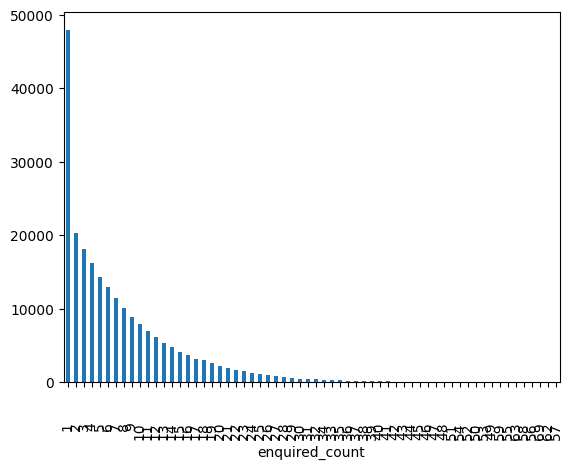

In [742]:
data_train['enquired_count'].value_counts().plot.bar()
plt.tick_params(axis='x', which='major', pad=25)
plt.show()

**Working on the test Data**

applying same functions as the train data

In [623]:
data_test_flag = pd.read_csv("/content/data/test/test_flag.csv")
data_test_flag

,uid,NAME_CONTRACT_TYPE
0,CMO22835242,Cash loans
1,MRJ34316727,Cash loans
2,UAV00534378,Cash loans
3,IPQ08190402,Cash loans
4,NQN84331006,Cash loans
...,...,...
46122,IQY03739314,Cash loans
46123,QIL15152190,Cash loans
46124,HMM67531434,Cash loans
46125,WWW87911447,Cash loans


In [624]:
data_test_flag['uid'].nunique()

46127

In [625]:
data_test_flag.isnull().sum().sort_values(ascending=False)

uid                   0
NAME_CONTRACT_TYPE    0
dtype: int64

In [626]:
data_test_flag['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         41707
Revolving loans     4420
Name: count, dtype: int64

In [627]:
data_test_flag['NAME_CONTRACT_TYPE'] = label_encoder.transform(data_test_flag['NAME_CONTRACT_TYPE'])
data_test_flag.set_index('uid', inplace=True)
data_test_flag

,NAME_CONTRACT_TYPE
uid,
CMO22835242,0
MRJ34316727,0
UAV00534378,0
IPQ08190402,0
NQN84331006,0
...,...
IQY03739314,0
QIL15152190,0
HMM67531434,0


In [628]:
with open('/content/data/test/accounts_data_test.json') as j:
    data = json.load(j)

In [629]:
len(data)

39572

In [630]:
data1 = []
for i in data:
  data1.extend(i)

In [631]:
len(data1)

220013

In [632]:
data_test_accounts = pd.DataFrame.from_records(data1)
data_test_accounts

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,31630.50,0.0,2014-03-30,2014-11-29,000000000000000000000000,AAA14437029
1,Consumer credit,14613.39,0.0,2014-06-01,2014-11-03,000000000000000,AAA14437029
2,Credit card,54000.00,0.0,2015-12-13,2019-09-21,0000000000000000000000000000000000000000000000...,AAA14437029
3,Consumer credit,27076.50,0.0,2015-11-11,2016-11-24,000000000000000000000000000000000000,AAA14437029
4,Credit card,225000.00,0.0,2017-07-15,2019-11-14,0000000000000000000000000000000000000000000000...,AAA14437029
...,...,...,...,...,...,...,...
220008,Credit card,450000.00,0.0,2020-04-16,NaN,000000000000000000000000,ZZZ02221122
220009,Credit card,225000.00,0.0,2020-04-08,NaN,000000000000000000000000,ZZZ02221122
220010,Credit card,0.00,0.0,2017-11-15,2019-06-15,0000000000000000000000000000000000000000000000...,ZZZ02221122
220011,Consumer credit,468000.00,0.0,2018-06-23,NaN,0000000000000000000000000000000020320620921221...,ZZZ02221122


In [633]:
values = (set(data_test_flag.index.tolist()) - set(data_test_accounts['uid'].tolist()))

In [634]:
mean_loan_amount = data_test_accounts['loan_amount'].mean()
mean_amount_overdue = data_test_accounts['amount_overdue'].mean()
mode_credit_type = data_test_accounts['credit_type'].mode()[0]
open_date = data_test_accounts['open_date'].mode()[0]
closed_date = data_test_accounts['closed_date'].mode()[0]
payment_hist_string = "000"

dummy_data = {
    'credit_type': [mode_credit_type]*len(values),
    'loan_amount': [mean_loan_amount]*len(values),
    'amount_overdue': [mean_amount_overdue]*len(values),
    'open_date': [open_date]*len(values),
    'closed_date':[closed_date]*len(values),
    'payment_hist_string':[payment_hist_string]*len(values),
    'uid': list(values)
}

In [635]:
data_test_accounts['open_date'].mode()[0]

'2020-01-03'

In [636]:
d_df = pd.DataFrame(dummy_data)
d_df

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,FLY89842458
1,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,ZAQ46362105
2,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,NYN15546517
3,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,KME37833933
4,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,MMR52612159
...,...,...,...,...,...,...,...
6550,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,GYK64289986
6551,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,MYA55214570
6552,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,IPC50270039
6553,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,NXV25908005


In [637]:
data_test_accounts = pd.concat([data_test_accounts, d_df], ignore_index=True)

In [638]:
data_test_accounts.isnull().sum().sort_values(ascending=False)

closed_date            81636
credit_type                0
loan_amount                0
amount_overdue             0
open_date                  0
payment_hist_string        0
uid                        0
dtype: int64

In [641]:
data_test_accounts

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,31630.500000,0.000000,2014-03-30,2014-11-29,000000000000000000000000,AAA14437029
1,Consumer credit,14613.390000,0.000000,2014-06-01,2014-11-03,000000000000000,AAA14437029
2,Credit card,54000.000000,0.000000,2015-12-13,2019-09-21,0000000000000000000000000000000000000000000000...,AAA14437029
3,Consumer credit,27076.500000,0.000000,2015-11-11,2016-11-24,000000000000000000000000000000000000,AAA14437029
4,Credit card,225000.000000,0.000000,2017-07-15,2019-11-14,0000000000000000000000000000000000000000000000...,AAA14437029
...,...,...,...,...,...,...,...
226563,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,GYK64289986
226564,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,MYA55214570
226565,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,IPC50270039
226566,Consumer credit,347921.948753,29.252941,2020-01-03,2018-06-22,000,NXV25908005


In [642]:
data_test_accounts['uid'].nunique()

46127

In [643]:
data_test_accounts['open_date'] = pd.to_datetime(data_test_accounts['open_date'])

In [644]:
data_test_accounts['closed_date'].fillna(datetime.datetime.today().date(),inplace=True)
data_test_accounts['closed_date'] = pd.to_datetime(data_test_accounts['closed_date'])

In [645]:
data_test_accounts.dtypes

credit_type                    object
loan_amount                   float64
amount_overdue                float64
open_date              datetime64[ns]
closed_date            datetime64[ns]
payment_hist_string            object
uid                            object
dtype: object

In [646]:
data_test_accounts['days'] = (data_test_accounts['closed_date'] - data_test_accounts['open_date']).dt.days

In [647]:
data_test_accounts['overdue_ratio'] = data_test_accounts['amount_overdue']/data_test_accounts['loan_amount']
data_test_accounts['overdue_time_r'] = data_test_accounts['amount_overdue']/data_test_accounts['days']

In [648]:
data_test_accounts['overdue_ratio'].fillna(value=0,inplace=True)
data_test_accounts['overdue_time_r'].fillna(value=0,inplace=True)
data_test_accounts.replace([np.inf, -np.inf], 0, inplace=True)

In [649]:
data_test_accounts['overdue_days']= data_test_accounts['payment_hist_string'].apply(payment_to_overdues)
data_test_accounts['maxi_overdue']= data_test_accounts['payment_hist_string'].apply(payment_to_maxi)
data_test_accounts['time_of_overdue'] = data_test_accounts['payment_hist_string'].apply(payment_to_count)
data_test_accounts.head(10)

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,days,overdue_ratio,overdue_time_r,overdue_days,maxi_overdue,time_of_overdue
0,Consumer credit,31630.50,0.0,2014-03-30,2014-11-29,000000000000000000000000,AAA14437029,244,0.0,0.0,0,0,0
1,Consumer credit,14613.39,0.0,2014-06-01,2014-11-03,000000000000000,AAA14437029,155,0.0,0.0,0,0,0
2,Credit card,54000.00,0.0,2015-12-13,2019-09-21,0000000000000000000000000000000000000000000000...,AAA14437029,1378,0.0,0.0,0,0,0
3,Consumer credit,27076.50,0.0,2015-11-11,2016-11-24,000000000000000000000000000000000000,AAA14437029,379,0.0,0.0,0,0,0
4,Credit card,225000.00,0.0,2017-07-15,2019-11-14,0000000000000000000000000000000000000000000000...,AAA14437029,852,0.0,0.0,1500,285,10
5,Consumer credit,1575000.00,0.0,2016-12-05,2017-07-03,000000000000000000000,AAA14437029,210,0.0,0.0,0,0,0
6,Credit card,58347.00,0.0,2016-06-21,2024-05-06,0000000000000000000000000000000000000000000000...,AAA14437029,2876,0.0,0.0,0,0,0
7,Credit card,42750.00,0.0,2019-10-26,2024-05-06,000000000000000000000000000000000000000000,AAA14437029,1654,0.0,0.0,0,0,0
8,Consumer credit,135000.00,0.0,2016-07-24,2016-12-05,000000000000,AAA14437029,134,0.0,0.0,0,0,0
9,Credit card,67500.00,0.0,2014-09-18,2016-06-21,0000000000000000000000000000000000000000000000...,AAA14437029,642,0.0,0.0,0,0,0


In [650]:
data_max_overdue = data_test_accounts.groupby('uid')['maxi_overdue'].max()
data_max_overdue = pd.DataFrame(data_max_overdue)
data_max_overdue

,maxi_overdue
uid,
AAA02107680,0
AAA14437029,285
AAB12915377,36
AAB55088883,0
AAB68152393,228
...,...
ZZX89351447,0
ZZX95870699,0
ZZY22936172,0


In [651]:
no_times_loan = data_test_accounts.groupby('uid')['loan_amount'].count()
no_times_loan = pd.DataFrame(no_times_loan)
no_times_loan.rename(columns={'loan_amount': 'no_times_loan'}, inplace=True)
no_times_loan

,no_times_loan
uid,
AAA02107680,1
AAA14437029,12
AAB12915377,3
AAB55088883,6
AAB68152393,7
...,...
ZZX89351447,6
ZZX95870699,5
ZZY22936172,8


In [652]:
data_test_accounts1 = data_test_accounts[['loan_amount','amount_overdue','uid','time_of_overdue','overdue_ratio','overdue_time_r','overdue_days']]

In [653]:
data_test_accounts2 = data_test_accounts1.groupby('uid').sum()

In [654]:
data_test_accounts2 = data_test_accounts2.join(no_times_loan)
data_test_accounts2 = data_test_accounts2.join(data_max_overdue)
data_test_accounts2['average_overdues'] = data_test_accounts2['overdue_days']/data_test_accounts2['no_times_loan']
data_test_accounts2['average_loan'] = data_test_accounts2['loan_amount']/data_test_accounts2['no_times_loan']
data_test_accounts3 = data_test_accounts2[['average_loan','time_of_overdue','overdue_ratio','overdue_time_r','overdue_days','no_times_loan','maxi_overdue','average_overdues']]
data_test_accounts3

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues
uid,,,,,,,,
AAA02107680,3.479219e+05,0,0.000084,-0.052237,0,1,0,0.000000
AAA14437029,3.113597e+05,10,0.000000,0.000000,1500,12,285,125.000000
AAB12915377,1.360027e+05,2,0.000000,0.000000,42,3,36,14.000000
AAB55088883,5.456575e+04,0,0.000000,0.000000,0,6,0,0.000000
AAB68152393,2.581052e+05,8,0.000000,0.000000,984,7,228,140.571429
...,...,...,...,...,...,...,...,...
ZZX89351447,3.063712e+05,0,0.000000,0.000000,0,6,0,0.000000
ZZX95870699,1.288449e+06,0,0.000000,0.000000,0,5,0,0.000000
ZZY22936172,9.695703e+04,0,0.000000,0.000000,0,8,0,0.000000


In [655]:
data_test_accounts2.isnull().sum().sort_values(ascending=False)

loan_amount         0
amount_overdue      0
time_of_overdue     0
overdue_ratio       0
overdue_time_r      0
overdue_days        0
no_times_loan       0
maxi_overdue        0
average_overdues    0
average_loan        0
dtype: int64

In [656]:
with open('/content/data/test/enquiry_data_test.json') as j:
    data = json.load(j)

In [657]:
len(data)

46127

In [658]:
data1 = []
for i in data:
  data1.extend(i)

In [659]:
len(data1)

337662

In [660]:
data_test_enquiry = pd.DataFrame.from_records(data1)
data_test_enquiry

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Car loan,143000,2020-12-13,AAA02107680
1,Real estate loan,174000,2020-12-01,AAA14437029
2,Loan for working capital replenishment,65000,2019-07-01,AAA14437029
3,Loan for working capital replenishment,118000,2020-08-05,AAA14437029
4,Car loan,12000,2020-02-28,AAA14437029
...,...,...,...,...
337657,Unknown type of loan,199000,2020-11-08,ZZZ02221122
337658,Revolving loans,145000,2020-10-16,ZZZ02221122
337659,Another type of loan,93000,2020-02-10,ZZZ02221122
337660,Mortgage,119000,2020-04-08,ZZZ02221122


In [661]:
data_test_enquiry['enquiry_date'] = pd.to_datetime(data_test_enquiry['enquiry_date'])

In [662]:
data_test_enquiry['enquiry_type'].value_counts()

enquiry_type
Cash loans                                      53125
Revolving loans                                 21168
Car loan                                        17894
Credit card                                     17701
Another type of loan                            17619
Real estate loan                                17618
Mobile operator loan                            17599
Microloan                                       17589
Loan for purchase of shares (margin lending)    17575
Unknown type of loan                            17524
Loan for business development                   17523
Loan for working capital replenishment          17511
Mortgage                                        17504
Cash loan (non-earmarked)                       17467
Loan for the purchase of equipment              17467
Interbank credit                                17393
Consumer credit                                 17385
Name: count, dtype: int64

In [663]:
data_test_enquiry.isnull().sum().sort_values(ascending=False)

enquiry_type    0
enquiry_amt     0
enquiry_date    0
uid             0
dtype: int64

In [664]:
data_test_enquiry.sort_values(by=['uid', 'enquiry_date'], inplace=True)

In [665]:
data_test_enquiry

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Car loan,143000,2020-12-13,AAA02107680
2,Loan for working capital replenishment,65000,2019-07-01,AAA14437029
4,Car loan,12000,2020-02-28,AAA14437029
3,Loan for working capital replenishment,118000,2020-08-05,AAA14437029
1,Real estate loan,174000,2020-12-01,AAA14437029
...,...,...,...,...
337659,Another type of loan,93000,2020-02-10,ZZZ02221122
337660,Mortgage,119000,2020-04-08,ZZZ02221122
337656,Cash loan (non-earmarked),183000,2020-04-23,ZZZ02221122
337658,Revolving loans,145000,2020-10-16,ZZZ02221122


In [666]:
data_test_enquiry2 = data_test_enquiry[['uid','enquiry_date','enquiry_amt']]
data_test_enquiry2

,uid,enquiry_date,enquiry_amt
0,AAA02107680,2020-12-13,143000
2,AAA14437029,2019-07-01,65000
4,AAA14437029,2020-02-28,12000
3,AAA14437029,2020-08-05,118000
1,AAA14437029,2020-12-01,174000
...,...,...,...
337659,ZZZ02221122,2020-02-10,93000
337660,ZZZ02221122,2020-04-08,119000
337656,ZZZ02221122,2020-04-23,183000
337658,ZZZ02221122,2020-10-16,145000


In [667]:
data_test_enquiry3 = data_test_enquiry2.groupby('uid').apply(next_date)

In [668]:
data_test_enquiry3['next_enquiry_date'].fillna(data_test_enquiry3['enquiry_date'],inplace=True)

In [669]:
data_test_enquiry3['days']= (data_test_enquiry3['next_enquiry_date'] - data_test_enquiry3['enquiry_date']).dt.days

In [670]:
data_test_enquiry3['days'] = data_test_enquiry3['days'].replace(0, 1)

In [671]:
data_test_enquiry4 = pd.DataFrame(data_test_enquiry3.values,columns=data_test_enquiry3.columns.values.tolist())

In [672]:
data_test_enquiry4['enquiry_amt_ratio'] = data_test_enquiry4['enquiry_amt'] / data_test_enquiry4['days']

In [673]:
data_test_enquiry4 = data_test_enquiry4[['uid','enquiry_amt_ratio']]

In [674]:
data_enquired = data_test_enquiry4.groupby('uid')['enquiry_amt_ratio'].count()
data_enquired = pd.DataFrame(data_enquired)
data_enquired.rename(columns={'enquiry_amt_ratio': 'enquired_count'}, inplace=True)
data_enquired

,enquired_count
uid,
AAA02107680,1
AAA14437029,4
AAB12915377,1
AAB55088883,14
AAB68152393,17
...,...
ZZX89351447,2
ZZX95870699,2
ZZY22936172,15


In [675]:
data_test_enquiry5 = data_test_enquiry4.groupby('uid').sum()
data_test_enquiry5 = pd.DataFrame(data_test_enquiry5)
data_test_enquiry5.head(10)

,enquiry_amt_ratio
uid,
AAA02107680,143000.0
AAA14437029,175344.066739
AAB12915377,137000.0
AAB55088883,159157.374265
AAB68152393,281485.090675
AAB81290576,89000.0
AAC29580834,125717.391304
AAC82689201,37434.863012
AAC85763409,158567.542232


In [676]:
data_enquired = data_enquired.join(data_test_enquiry5)
data_enquired

,enquired_count,enquiry_amt_ratio
uid,,
AAA02107680,1,143000.0
AAA14437029,4,175344.066739
AAB12915377,1,137000.0
AAB55088883,14,159157.374265
AAB68152393,17,281485.090675
...,...,...
ZZX89351447,2,76636.363636
ZZX95870699,2,163320.652174
ZZY22936172,15,333410.787506


In [677]:
data_test_accounts3

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues
uid,,,,,,,,
AAA02107680,3.479219e+05,0,0.000084,-0.052237,0,1,0,0.000000
AAA14437029,3.113597e+05,10,0.000000,0.000000,1500,12,285,125.000000
AAB12915377,1.360027e+05,2,0.000000,0.000000,42,3,36,14.000000
AAB55088883,5.456575e+04,0,0.000000,0.000000,0,6,0,0.000000
AAB68152393,2.581052e+05,8,0.000000,0.000000,984,7,228,140.571429
...,...,...,...,...,...,...,...,...
ZZX89351447,3.063712e+05,0,0.000000,0.000000,0,6,0,0.000000
ZZX95870699,1.288449e+06,0,0.000000,0.000000,0,5,0,0.000000
ZZY22936172,9.695703e+04,0,0.000000,0.000000,0,8,0,0.000000


In [678]:
data_amount = data_test_accounts3.join(data_enquired)
data_amount

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio
uid,,,,,,,,,,
AAA02107680,3.479219e+05,0,0.000084,-0.052237,0,1,0,0.000000,1,143000.0
AAA14437029,3.113597e+05,10,0.000000,0.000000,1500,12,285,125.000000,4,175344.066739
AAB12915377,1.360027e+05,2,0.000000,0.000000,42,3,36,14.000000,1,137000.0
AAB55088883,5.456575e+04,0,0.000000,0.000000,0,6,0,0.000000,14,159157.374265
AAB68152393,2.581052e+05,8,0.000000,0.000000,984,7,228,140.571429,17,281485.090675
...,...,...,...,...,...,...,...,...,...,...
ZZX89351447,3.063712e+05,0,0.000000,0.000000,0,6,0,0.000000,2,76636.363636
ZZX95870699,1.288449e+06,0,0.000000,0.000000,0,5,0,0.000000,2,163320.652174
ZZY22936172,9.695703e+04,0,0.000000,0.000000,0,8,0,0.000000,15,333410.787506


In [679]:
data_test = data_amount.join(data_test_flag)
data_test

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE
uid,,,,,,,,,,,
AAA02107680,3.479219e+05,0,0.000084,-0.052237,0,1,0,0.000000,1,143000.0,0
AAA14437029,3.113597e+05,10,0.000000,0.000000,1500,12,285,125.000000,4,175344.066739,0
AAB12915377,1.360027e+05,2,0.000000,0.000000,42,3,36,14.000000,1,137000.0,0
AAB55088883,5.456575e+04,0,0.000000,0.000000,0,6,0,0.000000,14,159157.374265,0
AAB68152393,2.581052e+05,8,0.000000,0.000000,984,7,228,140.571429,17,281485.090675,0
...,...,...,...,...,...,...,...,...,...,...,...
ZZX89351447,3.063712e+05,0,0.000000,0.000000,0,6,0,0.000000,2,76636.363636,0
ZZX95870699,1.288449e+06,0,0.000000,0.000000,0,5,0,0.000000,2,163320.652174,0
ZZY22936172,9.695703e+04,0,0.000000,0.000000,0,8,0,0.000000,15,333410.787506,0


**Accessing the train the test dataset created above, to make the model**

In [680]:
ids_train = data_train.index.tolist()
ids_train[:5]

[0, 1, 2, 3, 4]

In [681]:
ids_test = data_test.index.tolist()
ids_test[:5]

['AAA02107680', 'AAA14437029', 'AAB12915377', 'AAB55088883', 'AAB68152393']

In [682]:
len(ids_test)

46127

In [683]:
data_train = data_train.reset_index(drop=True)
data_train.head()

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE,TARGET
0,138622.500000,3,0.0,0.0,68,2,44,34.000000,26,559315.351205,0,0
1,80996.445000,0,0.0,0.0,0,1,0,0.000000,14,98051.165194,0,0
2,43771.500000,0,0.0,0.0,0,1,0,0.000000,15,172099.635366,0,0
3,84513.857143,31,0.0,0.0,14477,7,917,2068.142857,1,66000.0,0,0
4,318392.100000,0,0.0,0.0,0,5,0,0.000000,19,316575.233239,0,0


In [684]:
data_train['TARGET'].value_counts()

TARGET
0    205805
1     17185
Name: count, dtype: int64

In [685]:
data_test = data_test.reset_index(drop=True)
data_test

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE
0,3.479219e+05,0,0.000084,-0.052237,0,1,0,0.000000,1,143000.0,0
1,3.113597e+05,10,0.000000,0.000000,1500,12,285,125.000000,4,175344.066739,0
2,1.360027e+05,2,0.000000,0.000000,42,3,36,14.000000,1,137000.0,0
3,5.456575e+04,0,0.000000,0.000000,0,6,0,0.000000,14,159157.374265,0
4,2.581052e+05,8,0.000000,0.000000,984,7,228,140.571429,17,281485.090675,0
...,...,...,...,...,...,...,...,...,...,...,...
46122,3.063712e+05,0,0.000000,0.000000,0,6,0,0.000000,2,76636.363636,0
46123,1.288449e+06,0,0.000000,0.000000,0,5,0,0.000000,2,163320.652174,0
46124,9.695703e+04,0,0.000000,0.000000,0,8,0,0.000000,15,333410.787506,0
46125,7.684425e+04,0,0.000000,0.000000,0,2,0,0.000000,5,25357.173744,0


In [686]:
train_y = data_train['TARGET']
train_x1 = data_train.drop(['TARGET'],axis=1)
test_x1 = data_test

In [687]:
sm = SMOTE(sampling_strategy='minority', random_state=15)

Normalizing the data

In [688]:
from sklearn.preprocessing import MinMaxScaler

In [689]:
scaler = MinMaxScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x1), columns=train_x1.columns)
test_x = pd.DataFrame(scaler.transform(test_x1), columns=test_x1.columns)

In [690]:
train_x.head()

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE
0,0.000700,0.029412,0.0,0.0,0.001323,0.008850,0.044044,0.001690,0.367647,0.124700,0.0
1,0.000409,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.191176,0.021666,0.0
2,0.000221,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.205882,0.038206,0.0
3,0.000427,0.303922,0.0,0.0,0.281610,0.053097,0.917918,0.102811,0.000000,0.014506,0.0
4,0.001607,0.000000,0.0,0.0,0.000000,0.035398,0.000000,0.000000,0.264706,0.070478,0.0


In [691]:
test_x.head()

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE
0,0.001757,0.000000,0.000005,-0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.031706,0.0
1,0.001572,0.098039,0.000000,0.000000,0.029178,0.097345,0.285285,0.006214,0.044118,0.038931,0.0
2,0.000687,0.019608,0.000000,0.000000,0.000817,0.017699,0.036036,0.000696,0.000000,0.030366,0.0
3,0.000275,0.000000,0.000000,0.000000,0.000000,0.044248,0.000000,0.000000,0.191176,0.035315,0.0
4,0.001303,0.078431,0.000000,0.000000,0.019141,0.053097,0.228228,0.006988,0.235294,0.062640,0.0


Resampling the data, due to class imbalance

In [692]:
X, y = sm.fit_resample(train_x, train_y)
train_y = y
train_x = pd.DataFrame(X, columns=train_x.columns)

In [693]:
train_x

,average_loan,time_of_overdue,overdue_ratio,overdue_time_r,overdue_days,no_times_loan,maxi_overdue,average_overdues,enquired_count,enquiry_amt_ratio,NAME_CONTRACT_TYPE
0,0.000700,0.029412,0.000000e+00,0.000000e+00,0.001323,0.008850,0.044044,0.001690,0.367647,0.124700,0.0
1,0.000409,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.191176,0.021666,0.0
2,0.000221,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.205882,0.038206,0.0
3,0.000427,0.303922,0.000000e+00,0.000000e+00,0.281610,0.053097,0.917918,0.102811,0.000000,0.014506,0.0
4,0.001607,0.000000,0.000000e+00,0.000000e+00,0.000000,0.035398,0.000000,0.000000,0.264706,0.070478,0.0
...,...,...,...,...,...,...,...,...,...,...,...
411605,0.003036,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010649,0.0
411606,0.003685,0.009804,0.000000e+00,0.000000e+00,0.000245,0.017699,0.012632,0.000209,0.029412,0.030291,0.0
411607,0.000765,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008850,0.000000,0.000000,0.000000,0.000890,0.0
411608,0.000186,0.329652,1.016009e-07,2.190941e-08,0.326347,0.000000,0.988497,0.834004,0.091549,0.030410,0.0


In [694]:
train_y

0         0
1         0
2         0
3         0
4         0
         ..
411605    1
411606    1
411607    1
411608    1
411609    1
Name: TARGET, Length: 411610, dtype: int64

In [400]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [401]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [402]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Model : Logistic Regression**

In [711]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

In [712]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
logreg = LogisticRegression(random_state=15)
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=cv)

In [713]:
grid_search.fit(train_x, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             estimator=LogisticRegression(random_state=15),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [714]:
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
print(best_accuracy)

0.5385850683899808


In [715]:
y_pred = best_model.predict(test_x)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [716]:
y_pred.shape

(46127,)

**Model : XGB Classifier**

In [410]:
from xgboost import XGBClassifier

In [411]:
gbm_param_grid = {
    'n_estimators': range(100,1000,50),
    'max_depth': range(3, 11),
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

In [412]:
xgb = XGBClassifier()
xgb_r = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=xgb, scoring='accuracy',verbose=2, n_iter=50, cv=5, n_jobs=-1)

In [413]:
xgb_r.fit(train_x,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': range(3, 11),
                                        'n_estimators': range(100, 1000, 50)},
                   scoring='accuracy', verbose=2)

In [695]:
best_model = xgb_r.best_estimator_
best_accuracy = xgb_r.best_score_
print(best_accuracy)

0.8085299190981754


In [696]:
ypred = best_model.predict(test_x)

In [702]:
ypred

array([1, 0, 0, ..., 0, 0, 0])

Final Output

In [707]:
data = {
    'uid': ids_test,
    'pred': ypred
}

In [708]:
df = pd.DataFrame(data)

In [709]:
df.to_csv("submission_utkarsh_pathak.csv",index=False)

In [710]:
pd.read_csv("/content/submission_utkarsh_pathak.csv")

,uid,pred
0,AAA02107680,1
1,AAA14437029,0
2,AAB12915377,0
3,AAB55088883,0
4,AAB68152393,1
...,...,...
46122,ZZX89351447,0
46123,ZZX95870699,0
46124,ZZY22936172,0
46125,ZZY83980941,0
